Exloración y análisis de datos. 

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib
import umap
import matplotlib.pyplot as plt


In [271]:
df = pd.read_csv('data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [272]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

Descripción de variables:
region -  tipo de región: rural = 1; semirural = 2 y ciudad = 3
tenure - tiempo de permanencia en meses
age - edad
marital - soltero = 0; casado = 1
adress - tiempo en la vivienda habitual en años
income - ingresos
ed - nivel educativo
employ - tiempo que llevas trabajado
retire - no jubilado = 0; jubilado = 1
gender - género: mujer = 0; hombre = 1
reside - personas que conviven en el hogar. 
custcat - servicio al cliente: basic = 1; e-service = 2; Plus = 3; Total = 4



In [273]:
# Convertir float a int
df['income'] = df['income'].astype(int)
df['retire'] = df['retire'].astype(int)

df.dtypes

region     int64
tenure     int64
age        int64
marital    int64
address    int64
income     int64
ed         int64
employ     int64
retire     int64
gender     int64
reside     int64
custcat    int64
dtype: object

In [274]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [275]:
# Crear el imputador KNN
knn_imputer = KNNImputer(n_neighbors=5)

# Imputar los valores nulos
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Verificar que no hay más valores nulos
print("Valores nulos después de la imputación:")
print(df_imputed.isnull().sum())


Valores nulos después de la imputación:
region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


In [276]:
# Definir variables categóricas y numéricas
categorical_vars = ['region', 'marital', 'ed', 'retire', 'gender']
numerical_vars = ['tenure', 'age', 'address', 'income', 'employ', 'reside']

# Mostrar las primeras filas para verificar
print("Variables categóricas:")
print(df[categorical_vars].head())
print("\nVariables numéricas:")
print(df[numerical_vars].head())

Variables categóricas:
   region  marital  ed  retire  gender
0       2        1   4       0       0
1       3        1   5       0       0
2       3        1   1       0       1
3       2        0   2       0       1
4       2        1   1       0       0

Variables numéricas:
   tenure  age  address  income  employ  reside
0      13   44        9      64       5       2
1      11   33        7     136       5       6
2      68   52       24     116      29       2
3      33   33       12      33       0       1
4      23   30        9      30       2       4


Estadísticas descriptivas para variables numéricas:
            tenure          age      address       income       employ  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     35.526000    41.684000    11.551000    77.535000    10.987000   
std      21.359812    12.558816    10.086681   107.044165    10.082087   
min       1.000000    18.000000     0.000000     9.000000     0.000000   
25%      17.000000    32.000000     3.000000    29.000000     3.000000   
50%      34.000000    40.000000     9.000000    47.000000     8.000000   
75%      54.000000    51.000000    18.000000    83.000000    17.000000   
max      72.000000    77.000000    55.000000  1668.000000    47.000000   

            reside  
count  1000.000000  
mean      2.331000  
std       1.435793  
min       1.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max       8.000000  


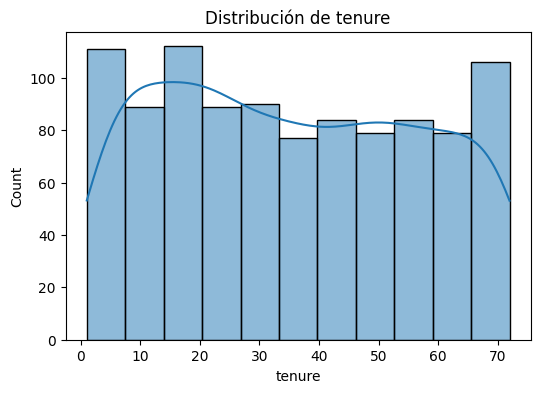

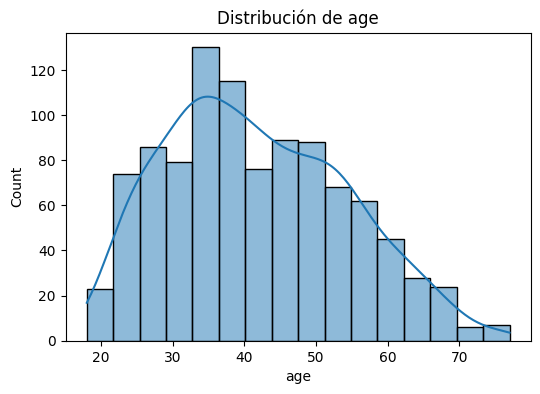

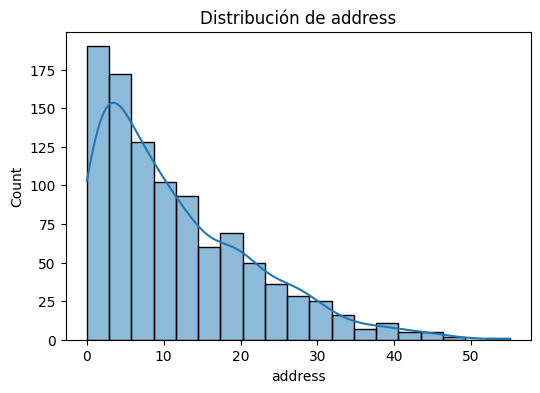

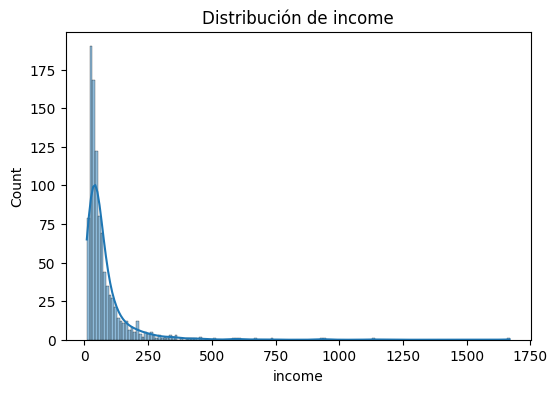

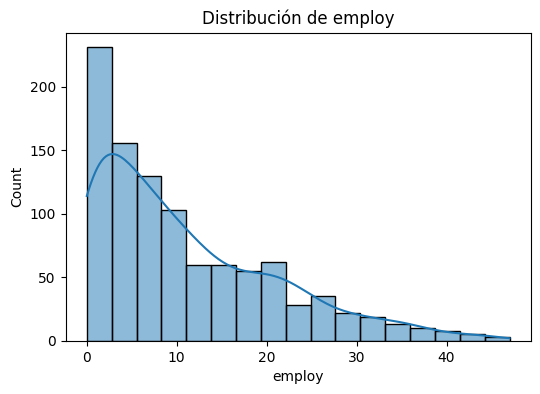

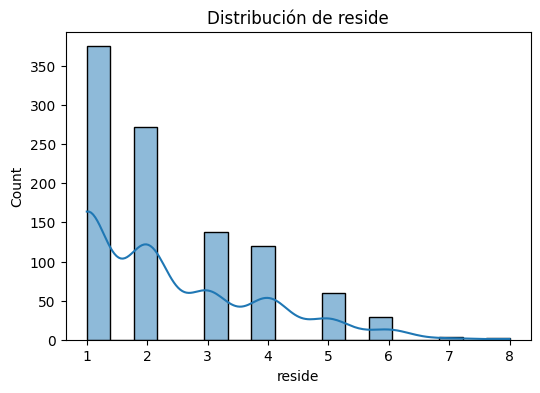

Tabla de frecuencia para region:
region
3    344
2    334
1    322
Name: count, dtype: int64

Tabla de frecuencia para marital:
marital
0    505
1    495
Name: count, dtype: int64

Tabla de frecuencia para ed:
ed
2    287
4    234
3    209
1    204
5     66
Name: count, dtype: int64

Tabla de frecuencia para retire:
retire
0    953
1     47
Name: count, dtype: int64

Tabla de frecuencia para gender:
gender
1    517
0    483
Name: count, dtype: int64



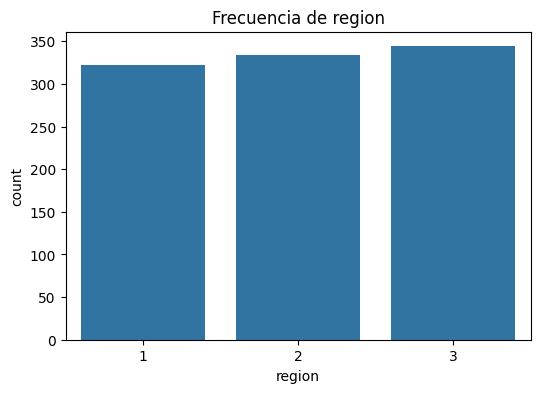

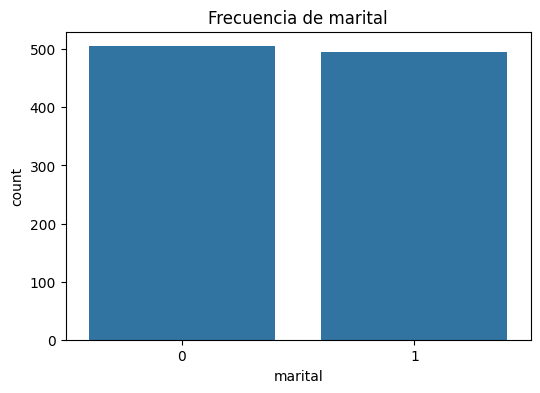

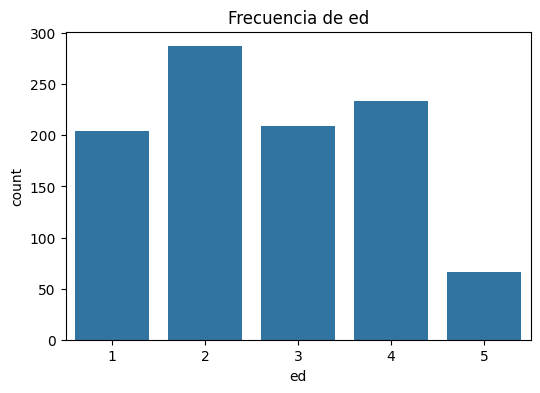

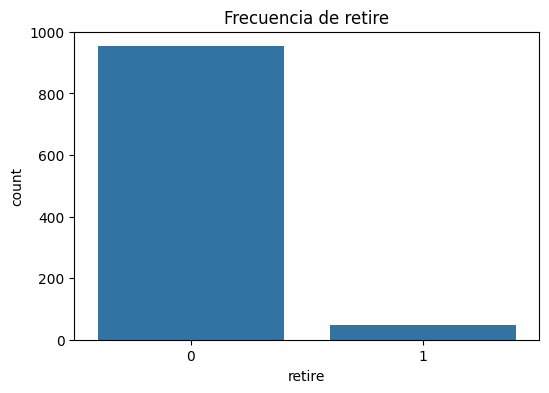

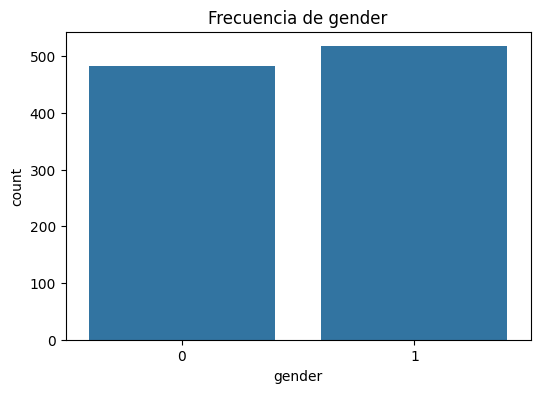

In [277]:
# Estadísticas descriptivas para variables numéricas
print("Estadísticas descriptivas para variables numéricas:")
print(df[numerical_vars].describe())

# Gráficas de distribución para variables numéricas
for var in numerical_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.show()

# Tablas de frecuencia para variables categóricas
for var in categorical_vars:
    print(f'Tabla de frecuencia para {var}:')
    print(df[var].value_counts())
    print()
    # Gráficas de barras para variables categóricas
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[var])
    plt.title(f'Frecuencia de {var}')
    plt.show()

Estadísticas descriptivas para variables numéricas:
            tenure          age      address       income       employ  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     35.526000    41.684000    11.551000    77.535000    10.987000   
std      21.359812    12.558816    10.086681   107.044165    10.082087   
min       1.000000    18.000000     0.000000     9.000000     0.000000   
25%      17.000000    32.000000     3.000000    29.000000     3.000000   
50%      34.000000    40.000000     9.000000    47.000000     8.000000   
75%      54.000000    51.000000    18.000000    83.000000    17.000000   
max      72.000000    77.000000    55.000000  1668.000000    47.000000   

            reside  
count  1000.000000  
mean      2.331000  
std       1.435793  
min       1.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max       8.000000  


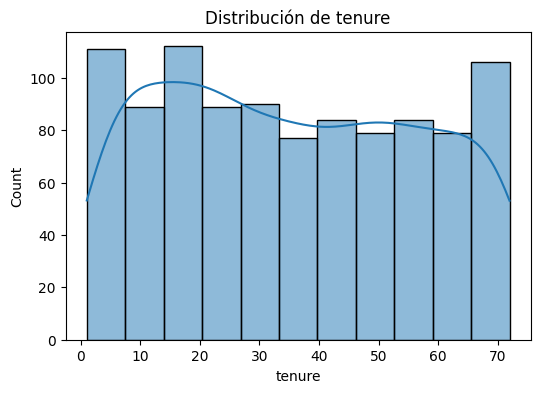

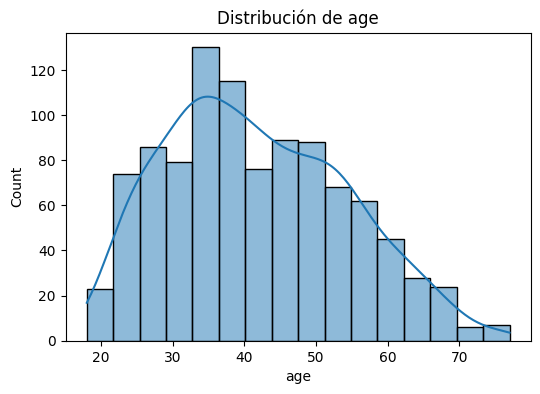

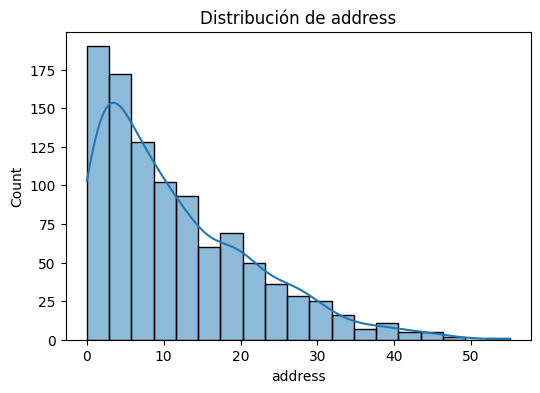

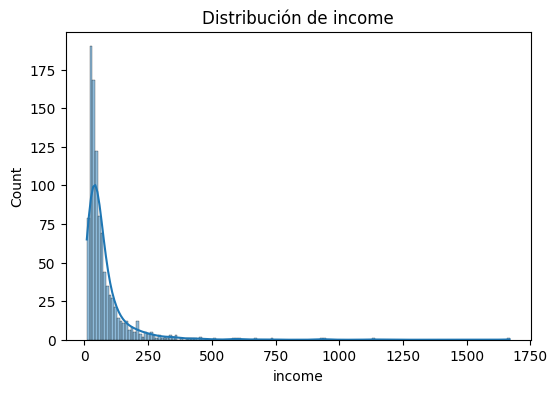

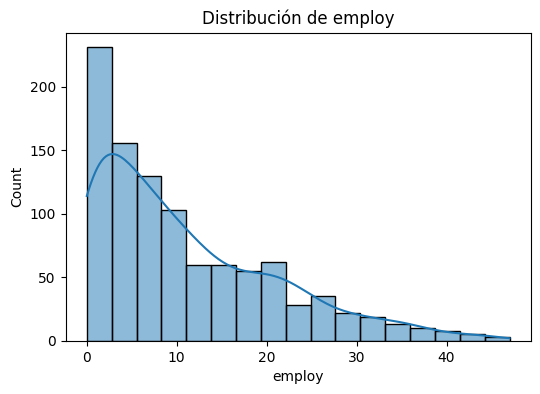

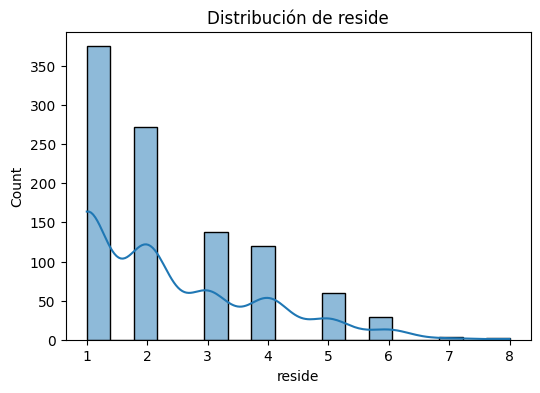

In [278]:
# Estadísticas descriptivas para variables numéricas
print("Estadísticas descriptivas para variables numéricas:")
print(df[numerical_vars].describe())

# Gráficas de distribución para variables numéricas
for var in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.show()

In [279]:
# Función para detectar outliers utilizando el método del rango intercuartílico (IQR)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Identificar outliers en columnas numéricas relevantes
outliers_address = detect_outliers_iqr(df, 'address')
outliers_income = detect_outliers_iqr(df, 'income')
outliers_employ = detect_outliers_iqr(df, 'employ')

# Mostrar resultados
print("Outliers en 'address':")
print(outliers_address)

print("\nOutliers en 'income':")
print(outliers_income)

print("\nOutliers en 'employ':")
print(outliers_employ)

Outliers en 'address':
     region  tenure  age  marital  address  income  ed  employ  retire  \
67        1      72   67        1       44      51   1      34       1   
206       1      72   69        1       49      44   2      44       1   
208       3      72   64        0       41     674   4      37       0   
241       2      72   66        1       43      96   2      16       0   
253       1      45   66        0       43     144   2      13       0   
287       1      35   66        1       44      14   3      12       1   
413       1      72   69        0       45      17   3      36       1   
590       3      62   63        0       43     341   2      30       0   
670       3      72   75        0       48      14   2       6       1   
671       3      58   61        0       42     101   4      18       0   
688       3      52   64        0       44      43   3       7       0   
697       2      65   72        0       46      12   2       0       1   
784       3    

In [280]:
'''#Imputar outliers (descomentar si decides imputar)
median_income = df['income'].median()
df.loc[outliers_income.index, 'income'] = median_income
median_employ = df['employ'].median()
df.loc[outliers_employ.index, 'employ'] = median_employ'''

"#Imputar outliers (descomentar si decides imputar)\nmedian_income = df['income'].median()\ndf.loc[outliers_income.index, 'income'] = median_income\nmedian_employ = df['employ'].median()\ndf.loc[outliers_employ.index, 'employ'] = median_employ"

In [281]:
#Capar outliers 
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #Capar valores por debajo del límite inferior
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    
    #Capar valores por encima del límite superior
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

#Aplicar capado a las columnas relevantes 
cap_outliers(df, 'income')
cap_outliers(df, 'employ')

In [282]:
print("Columnas actuales en df:", df_imputed.columns.tolist())
df_imputed.columns = df_imputed.columns.str.strip()

df = df_imputed.copy()

# Ajustar la variable custcat para que empiece en 0
df['custcat'] -= 1  # Ahora será 0, 1, 2, 3

# Convertir a logarítmico para reducir el sesgo positivo
df['income'] = np.log1p(df['income'])
df['address'] = np.log1p(df['address'])
df['employ'] = np.log1p(df['employ'])


# Normalizar variables numéricas
scaler = StandardScaler()
df[numerical_vars] = scaler.fit_transform(df[numerical_vars])

# Guardar el scaler
joblib.dump(scaler, 'scaler.joblib') 

# Codificación one-hot para variables categóricas (excepto binarias)
one_hot_vars = ['region', 'ed']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' para evitar colinealidad
encoded_features = encoder.fit_transform(df[one_hot_vars])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(one_hot_vars))

# Guardar el encoder
joblib.dump(encoder, 'encoder.joblib')

# Crear un nuevo DataFrame codificado sin modificar el original
dataset_encoded = pd.concat([df, encoded_df], axis=1)
dataset_encoded.to_csv('dataset_encoded.csv', index=False)

# Asignar el DataFrame codificado a df para mantener la consistencia
df = dataset_encoded

# Mostrar las primeras filas para verificar
print("Variables numéricas normalizadas:")
print(df[numerical_vars].head())
print("\nVariables categóricas codificadas:")
print(encoded_df.head())

Columnas actuales en df: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']
Variables numéricas normalizadas:
     tenure       age   address    income    employ    reside
0 -1.055125  0.184505  0.162034  0.244307 -0.236752 -0.230650
1 -1.148806 -0.691812 -0.070099  1.190405 -0.236752  2.556662
2  1.521092  0.821826  1.115239  0.990161  1.295006 -0.230650
3 -0.118319 -0.691812  0.434968 -0.577987 -1.942032 -0.927478
4 -0.586722 -0.930808  0.162034 -0.695202 -0.896444  1.163006

Variables categóricas codificadas:
   region_2.0  region_3.0  ed_2.0  ed_3.0  ed_4.0  ed_5.0
0         1.0         0.0     0.0     0.0     1.0     0.0
1         0.0         1.0     0.0     0.0     0.0     1.0
2         0.0         1.0     0.0     0.0     0.0     0.0
3         1.0         0.0     1.0     0.0     0.0     0.0
4         1.0         0.0     0.0     0.0     0.0     0.0


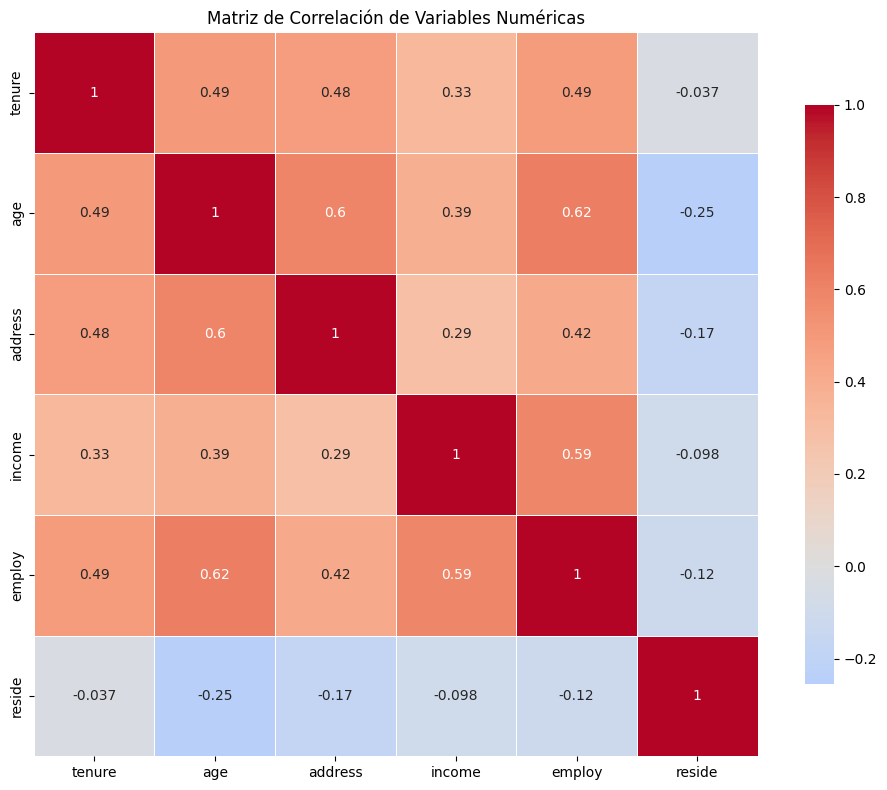

Correlaciones significativas:
age - address: 0.5973440934577758
age - employ: 0.6207796279703185
income - employ: 0.5857104570485598


In [283]:
# Matriz de correlación
correlation_matrix = df[numerical_vars].corr()

# Visualización de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

# Identificar correlaciones significativas
print("Correlaciones significativas:")
for i in range(len(numerical_vars)):
    for j in range(i+1, len(numerical_vars)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:  # Umbral de correlación significativa
            print(f"{numerical_vars[i]} - {numerical_vars[j]}: {corr_value}")


In [284]:
print(df.columns.tolist())

['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat', 'region_2.0', 'region_3.0', 'ed_2.0', 'ed_3.0', 'ed_4.0', 'ed_5.0']


In [285]:
df.isnull().sum()


region        0
tenure        0
age           0
marital       0
address       0
income        0
ed            0
employ        0
retire        0
gender        0
reside        0
custcat       0
region_2.0    0
region_3.0    0
ed_2.0        0
ed_3.0        0
ed_4.0        0
ed_5.0        0
dtype: int64

In [286]:
# Separar las variables predictoras y la variable objetivo
X = df.drop('custcat', axis=1)
y = df['custcat']

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


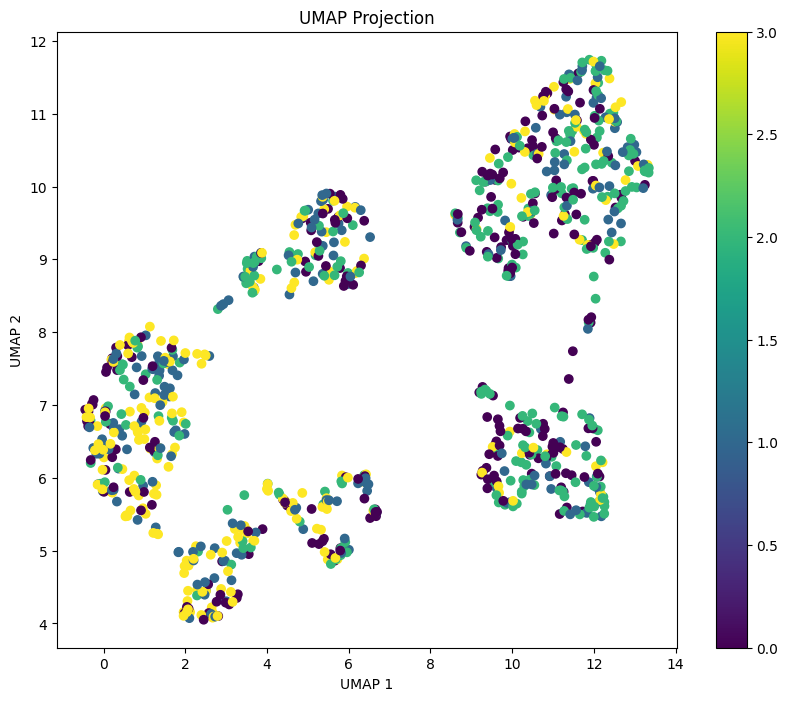

In [287]:


# Asumiendo que X es tu conjunto de datos y y es la variable objetivo
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
embedding = reducer.fit_transform(X)

# Crear y guardar un DataFrame con los componentes UMAP
df_umap = pd.DataFrame(data=embedding, columns=['UMAP 1', 'UMAP 2'])
df_umap['custcat'] = y  # Añadir la variable objetivo
df_umap.to_csv('umap_results.csv', index=False)

# Guardar el modelo UMAP
joblib.dump(reducer, 'umap_transformer.joblib')

# Visualizar los resultados
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_umap['UMAP 1'], df_umap['UMAP 2'], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.title('UMAP Projection')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()